Example 3: Full Pipeline Prediction

Input: A sequence of 10 windows of time series data
Process:

Each window is encoded by the VAE into the latent space
The sequence of 9 embeddings is fed into the LSTM
The LSTM predicts the 10th embedding
The predicted embedding is decoded by the VAE


Output: Predicted 10th window of the time series


Visualization:
The code includes visualization of the results:

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# add a path to the directory where the modules are located
import sys
sys.path.append('../')
from ngsim_dataset import NGSIMDataset
from config import train_configurations

In [5]:
# settings for data loader
class DataSettings:
    def __init__(self):
        # location of datasets and category
        end_name = 'ngsim_sample.csv' # dataset name
        data_file = end_name # dataset category and dataset name
        # key = 'realKnownCause/'+end_name # This key is used for reading anomaly labels
        self.BASE = '/Users/thinhhoang/Documents/ClaudeTANOGAN/NGSIM_Dataset' # Macbook Air 
        # self.BASE = '/workspace/ClaudeTANOGAN/NGSIM_Dataset' # Server
        # check if self.BASE has the last '/'
        if self.BASE[-1] != '/':
            self.BASE += '/'
        # self.label_file = 'labels\\combined_windows.json'
        self.data_file = data_file
        # self.key = key
        self.train = True
        self.window_length = 32
        self.column_name = 'Velocity'

dataset = NGSIMDataset(data_settings = DataSettings())
train_loader = dataset.get_train_data(train_configurations)
print(f'Shape of dataset: {dataset.x.shape}')

Select column name: Velocity
Shape of dataset: torch.Size([23400, 1, 32])


In [6]:
from arch_skip import VAE_LSTM_Model
model = VAE_LSTM_Model(train_configurations)

In [ ]:
# Summarize the model
from torchsummary import summary
summary(model.vae, (1, 32))

In [ ]:
# Train VAE

import torch 
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Selected device: ', device)
print('---------------------------')
print('Training VAE...')
# Train the VAE
model.train_vae(train_loader)

In [13]:
# Test the VAE
import torch
test_piece = dataset.x[0].reshape(1, 1, 32)
test_piece = torch.tensor(test_piece, dtype=torch.float32)
# Call the VAE model
reconstructed_piece, mu, logvar = model.vae(test_piece)
print('Reconstructed piece shape: ', reconstructed_piece.shape)
# Move the reconstructed piece to the cpu
reconstructed_piece = reconstructed_piece.cpu().detach().numpy()

Reconstructed piece shape:  torch.Size([1, 1, 32])


/var/folders/r4/52yfj2854bl5v3zcbd28w4_r0000gn/T/ipykernel_10209/3318856505.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_piece = torch.tensor(test_piece, dtype=torch.float32)


Matplotlib is building the font cache; this may take a moment.


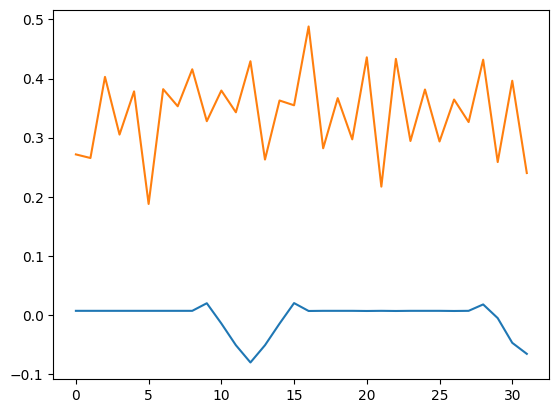

In [16]:
from matplotlib import pyplot as plt
plt.plot(test_piece[0][0], label='Original')
plt.plot(reconstructed_piece[0][0], label='Reconstructed')